In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

In [3]:
dataset2 = pd.read_csv("./data/anime_cleaned.csv")

In [4]:
class genres_treatment:
    def __init__(self):
        self.genre_cluster_dictionary = { #Terminar de agrupar
            'Romance' : ['Romance','Drama','School','Slice of Life'],
            'Shoujo' : ['Shoujo','Shoujo Ai','Jousei','Shounen Ai'],
            'Ecchi' : ['Ecchi','Harem'],
            'Sports' : ['Sports','Cars'],
            'Sci-Fi' : ['Sci-Fi','Space','Mecha'],
            'Action' : ['Action','Military'],
            'Shounen' : ['Shounen','Seinen','Super Power','Martial Arts'],
            'Comedy' : ['Comedy','Parody'],
            'Fantasy' : ['Fantasy','Adventure','Magic'],
            'Music' : ['Music'],
            'Supernatural' : ['Supernatural','Vampire','Demons'],
            'Gore' : ['Gore','Horror','Dementia'],
            'Historical' : ['Historical','Samurai'],
            'Thriller' : ['Thriller','Psycological'],
            'Mistery' : ['Mistery','Police'],
            'Hentai' : ['Yuri','Yaoi','Hentai']
        }
        self.suma = 0
    def genres_split_vectorization(self,genres,index=0):
        #genres param must be the genre series of the dataset
        genres_vec = genres[index].split(', ')
        return genres_vec
    
    def genres_clustering(self,genres_vec):
        genres_clustered_vec = []
        for i in range(3):            
            for genre_cluster in self.genre_cluster_dictionary:
                for genre in genres_vec:
                    if genre in self.genre_cluster_dictionary.get(genre_cluster):
                        genres_vec.remove(genre)
                        if not genre_cluster in genres_clustered_vec:
                            genres_clustered_vec.append(genre_cluster)
        if not len(genres_vec) == 0:
            genres_clustered_vec.append('Otro')
        return genres_clustered_vec
    
    def genres_parser(self,genres_clustered_vec):
        genres_bin_vector = np.zeros(17,np.int8)
        def romance(self):
            genres_bin_vector[0] = 1
            self.suma += 2**1
        def shoujo(self):
            genres_bin_vector[1] = 1
            self.suma += 2**9
        def ecchi(self):
            genres_bin_vector[2] = 1
            self.suma += 2**8
        def sports(self):
            genres_bin_vector[3] = 1
            self.suma += 2**12
        def sciFi(self):
            genres_bin_vector[4] = 1
            self.suma += 2**5
        def action(self):
            genres_bin_vector[5] = 1
            self.suma += 2**3
        def shounen(self):
            genres_bin_vector[6] = 1
            self.suma += 2**4
        def comedy(self):
            genres_bin_vector[7] = 1
            self.suma += 2**0
        def fantasy(self):
            genres_bin_vector[8] = 1
            self.suma += 2**2
        def music(self):
            genres_bin_vector[9] = 1
            self.suma += 2**13
        def supernatural(self):
            genres_bin_vector[10] = 1
            self.suma += 2**7
        def gore(self):
            genres_bin_vector[11] = 1
            self.suma += 2**14
        def historical(self):
            genres_bin_vector[12] = 1
            self.suma += 2**10
        def thriller(self):
            genres_bin_vector[13] = 1
            self.suma += 2**16
        def mistery(self):
            genres_bin_vector[14] = 1
            self.suma += 2**15
        def hentai(self):
            genres_bin_vector[15] = 1
            self.suma += 2**11
        def otro(self):
            genres_bin_vector[16] = 1
            self.suma += 2**6
        switcher = {
            'Romance': romance,
            'Shoujo': shoujo,
            'Ecchi': ecchi,
            'Shounen': shounen,
            'Fantasy': fantasy,
            'Comedy': comedy,
            'Music': music,
            'Sports': sports,
            'Hentai': hentai,
            'Historical': historical,
            'Mistery': mistery,
            'Thriller': thriller,
            'Supernatural': supernatural,
            'Gore': gore,
            'Sci-Fi': sciFi,
            'Action': action,
            'Otro': otro
        }
        for genre in genres_clustered_vec:
            func = switcher.get(genre)
            func(self)
        return genres_bin_vector, self.suma
    
    

In [207]:
treatment = genres_treatment()
popularity = dataset2['popularity']
favorites = dataset2['favorites']
score = dataset2['score']
source = dataset2['source']
atype = dataset2['type']
episodes = dataset2['episodes']
genres = []
decimal = []
vector = []
for i in range(len(dataset2)):
    if type(dataset2['genre'].iloc[i]) == float:
        dataset2['genre'].iloc[i] = 'none'
    phase1 = treatment.genres_split_vectorization(dataset2['genre'],i)
    phase2 = treatment.genres_clustering(phase1)
    genres.append(', '.join(phase2))
    decimal.append(treatment.genres_parser(phase2)[1])
    vector.append(treatment.genres_parser(phase2)[0])
treated_data = pd.DataFrame({
    'Popularity' : popularity,
    'Favorites' : favorites,
    'Score' : score,
    'Source' : source,
    'Type' : atype,
    'Episodes' : episodes,
    'Genres' : genres,
    'Decimal' : pd.Series(decimal)
})

In [208]:
counts = np.zeros(17, int)
for i in range(len(vector)):
    for k in range(17):
        if vector[i][k]:
            counts[k] += 1
print counts

[3053  533  640  352 1442 2151 1923 3054 2369  329  971  262  451   79  155
  356 1179]


In [209]:
treated_data.head()

,Decimal,Episodes,Favorites,Genres,Popularity,Score,Source,Type
0,147,12,2809,"Comedy, Romance, Shounen, Supernatural",231,7.63,Manga,TV
1,313,26,2579,"Comedy, Romance, Shounen",366,7.89,Manga,TV
2,851,51,802,"Comedy, Romance, Fantasy, Shoujo",1173,7.55,Manga,TV
3,1377,38,3344,"Comedy, Romance, Fantasy",916,8.21,Original,TV
4,1403,25,2082,"Comedy, Romance, Shounen",426,8.67,Manga,TV


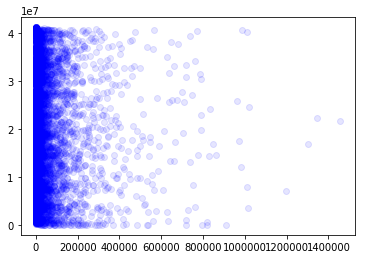

In [219]:
plt.scatter(dataset2['members'],treated_data['Decimal'], c="blue", cmap='rainbow', alpha=0.1);

In [1]:
import pandas as pd
import numpy as np

class source_num:
    def __init__(self):
        self.res = 'nan'
    def komaManga(self):
        self.res = 0
    def book(self):
        self.res = 1
    def cardGame(self):
        self.res = 2
    def digitalManga(self):
        self.res = 3
    def game(self):
        self.res = 4
    def lightNovel(self):
        self.res = 5
    def manga(self):
        self.res = 6
    def music(self):
        self.res = 7
    def novel(self):
        self.res = 8
    def original(self):
        self.res = 9
    def other(self):
        self.res = 10
    def pictureBook(self):
        self.res = 11
    def radio(self):
        self.res = 12
    def visualNovel(self):
        self.res = 13
    def webManga(self):
        self.res = 14
    def otro(self):
        self.res = 15
    def getRes(self):
        return self.res

def source_parser(source):
    sw = source_num()
    switcher={
        '4-Koma manga': sw.komaManga,
        'Book': sw.book,
        'Card game': sw.cardGame,
        'Digital manga': sw.digitalManga,
        'Game': sw.game,
        'Light novel': sw.lightNovel,
        'Manga': sw.manga,
        'Music': sw.music,
        'Novel': sw.novel,
        'Original': sw.original,
        'Other': sw.other,
        'Picture book': sw.pictureBook,
        'Radio': sw.radio,
        'Visual novel': sw.visualNovel,
        'Web manga': sw.webManga
    }
    func=switcher.get(source, sw.otro)

    return func(), sw.getRes()

data = treated_data['Source'][:100]
for i in range(len(data)):
    if type(data.iloc[i]) == float:
        data.iloc[i] = 'none'

for i in range(len(data)):
    data[i] = source_parser(data[i])[1]

NameError: name 'treated_data' is not defined